1. Виведіть перші 8 рядків набору даних.

In [10]:
import pandas as pd
df = pd.read_csv("data/NationalNames.csv")
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


2. Вивести останні 8 рядків набору даних.

In [11]:
import pandas as pd 
df = pd.read_csv("data/NationalNames.csv")
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


4. Отримайте загальну інформацію про дані у наборі даних.

In [12]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


5. Знайдіть кількість унікальних імен у наборі даних

In [13]:
import pandas as pd
df = pd.read_csv("data/NationalNames.csv")
df['Name'].nunique()

93889

6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому
наборі даних

In [28]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")
name_counts = df.groupby(['Gender', 'Name'])['Name'].nunique()

male_count = name_counts.loc['M'].shape[0]
female_count = name_counts.loc['F'].shape[0]

result_df = pd.DataFrame({
    'Gender': ['M', 'F'],
    'Name': [male_count, female_count]
})

display(result_df)


,Gender,Name
0,M,39199
1,F,64911


7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [39]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")
df[(df['Gender'] == 'M') & (df['Year'] == 2010)].head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для
якого Count максимальне)

In [45]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")
name = df.loc[df['Count'].idxmax(), 'Name']
year  = df.loc[df['Count'].idxmax(), 'Year']
print("The name is", name, "in", year )

The name is Linda in 1947


9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [48]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")
df[df['Count'] == df['Count'].min()].shape[0]

254615

10. Підрахуйте кількість унікальних імен у кожному році

In [17]:
import pandas as pd

# load the data into a DataFrame
df = pd.read_csv('data/NationalNames.csv')
df.groupby('Year')['Name'].nunique().reset_index()

,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


11. Знайдіть рік із найбільшою кількістю унікальних імен.

In [10]:
import pandas as pd
df = pd.read_csv("data/NationalNames.csv")

grouped = df.groupby(['Year', 'Name'])['Name'].nunique().reset_index(name='Count')
unique_names_by_year = grouped.groupby('Year')['Count'].count().reset_index(name='Name')
max_year = unique_names_by_year.loc[unique_names_by_year['Name'].idxmax()]

pd.DataFrame({'Year': [max_year['Year']], 'Name': [max_year['Name']]})

,Year,Name
0,2008,32488


12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю
унікальних імен (тобто у 2008 році)

In [3]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")

year_with_most_unique_names = df.groupby('Year')['Name'].nunique().idxmax()
df_filtered = df[df['Year'] == year_with_most_unique_names]
df_filtered.loc[df_filtered['Count'].idxmax(), 'Name']

'Jacob'

18. Підрахуйте кількість років, коли дівчаток народжувалось більше,
ніж хлопчиків.

In [1]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")
counts_by_year_and_gender = pd.pivot_table(df, index='Year', columns='Gender', values='Count', aggfunc=sum)
num_years_with_more_girls = sum(counts_by_year_and_gender['F'] > counts_by_year_and_gender['M'])

print(num_years_with_more_girls)

54


19. Накресліть графік загальної кількості народжень хлопчиків та
дівчаток на рік.

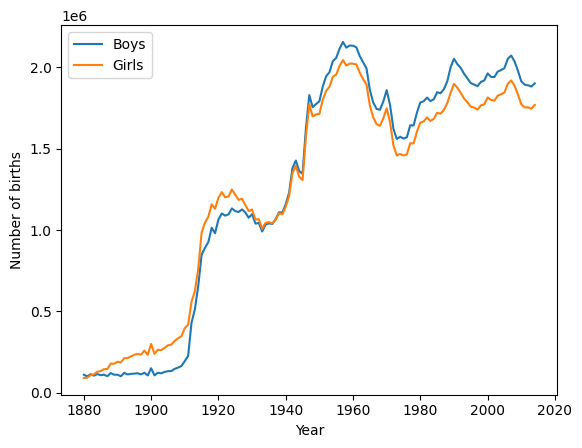

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/NationalNames.csv")

grouped = df.groupby(['Year', 'Gender'])['Count'].sum().reset_index()

boys = grouped[grouped['Gender'] == 'M']
girls = grouped[grouped['Gender'] == 'F']

plt.plot(boys['Year'], boys['Count'], label='Boys')
plt.plot(girls['Year'], girls['Count'], label='Girls')

plt.xlabel('Year')
plt.ylabel('Number of births')
plt.legend()

plt.show()


20. Підрахуйте кількість гендерно-нейтральних імен (однакових для
дівчат та хлопців)

In [2]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")

counts_by_name_and_gender = df.groupby(['Name', 'Gender']).size().reset_index(name='Count')

num_gender_neutral_names = counts_by_name_and_gender.groupby('Name').size().reset_index(name='Count')\
                        .loc[lambda x: x['Count'] == 2]['Name'].nunique()

print(num_gender_neutral_names)


10221


21. Порахуйте, скільки разів хлопчиків називали Barbara

In [3]:
import pandas as pd
df = pd.read_csv("data/NationalNames.csv")
num_boys_named_barbara = len(df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')])
print(num_boys_named_barbara)

79


23. Знайти найпопулярніші гендерно-нейтральні імена (ті, що присутні
кожного року)

In [10]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")

neutral_names = df.groupby('Name')['Count'].sum().loc[df.groupby('Name')['Gender'].nunique() == 2]
top_neutral_names = neutral_names.sort_values(ascending=False)[:15]
pd.DataFrame(top_neutral_names.index, columns=['Name'])

,Name
0,James
1,John
2,Robert
3,Michael
4,Mary
5,William
6,David
7,Joseph
8,Richard
9,Charles


25. Побудувати графіки розподілення кількості імен John та Mary по
роках без залежності до статі.

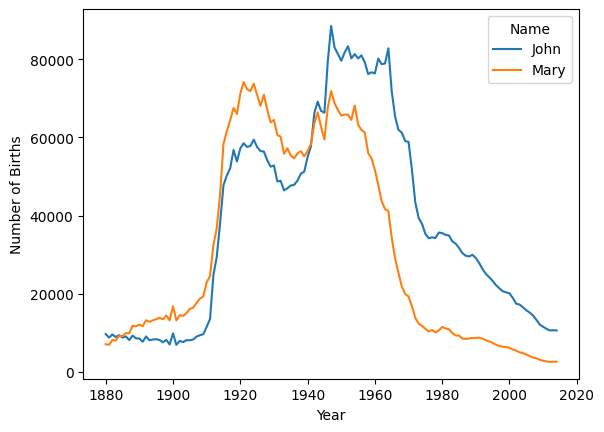

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/NationalNames.csv")
john_and_mary = df[(df['Name'].isin(['John', 'Mary']))]
john_and_mary_by_year = john_and_mary.groupby(['Year', 'Name'])['Count'].sum().reset_index()
john_and_mary_by_year_pivot = john_and_mary_by_year.pivot(index='Year', columns='Name', values='Count')
john_and_mary_by_year_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

27. Знайти найпопулярніші імена в кожному році.

In [5]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")
most_popular_by_year = df.groupby(['Year', 'Name'])['Count'].sum().reset_index()
most_popular_by_year = most_popular_by_year.loc[most_popular_by_year.groupby('Year')['Count'].idxmax()]
pd.DataFrame(most_popular_by_year, columns=['Year', 'Name', 'Count'])

,Year,Name,Count
955,1880,John,9701
2818,1881,John,8795
4735,1882,John,9597
6727,1883,John,8934
8775,1884,John,9428
...,...,...,...
1521288,2010,Isabella,22913
1568092,2011,Sophia,21839
1599369,2012,Sophia,22285
1630271,2013,Sophia,21172
